<a href="https://colab.research.google.com/github/arulnambi-palani/modern-resume/blob/master/final_project_garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



---



Importing all necessary modules needed for this project (not necessary to run, as in the below sections the main packages are imported again)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import os
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Just to check if the code is working in colab.

In [ ]:
x = 10
print(x**2)

100


As first step, import the datasets (garbage collection) that was downloaded/available from Kaggle. The images as datasets can be directly imported via
Kagglehub. It stores the datasets locally and gives the path to the location.


---

Once imported, the path to the folder and the content of the folders are checked using various output statements.




In [ ]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishallazrus/multi-class-garbage-classification-dataset")

print("Path to dataset files:", path)

for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(filenames)} images in '{dirpath}'.")

# Point to test subfolder
test_path = os.path.join(path, "Multi class garbage classification/test/plastic")
print("Test path:", test_path)
# List all files
files = os.listdir(test_path)

# Filter only images (optional, in case there are extra files)
image_files = [f for f in files if f.lower().endswith((".jpg", ".jpeg", ".png"))]

# Number of images
print(f"Number of images in test set: {len(image_files)}")

# Print first 10 file names
print("Sample files:", image_files[:10])


100%|██████████| 29.2M/29.2M [00:00<00:00, 175MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1
There are 0 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1'.
There are 1 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification'.
There are 0 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification/test'.
There are 44 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification/test/plastic'.
There are 43 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification/test/trash'.
There are 40 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbag

Once downloaded, using the path, the number of images in each folder is combed and checked (for information sake and checking if the dataset is completely downloaded)

In [ ]:
from fastai.vision.all import *
import kagglehub

# Download dataset from KaggleHub and extract the path
path = kagglehub.dataset_download("vishallazrus/multi-class-garbage-classification-dataset")
print("Path to dataset files:", path)

# Adjust path to point to the actual image folders
data_path = f"{path}/Multi class garbage classification"

# Create DataLoaders from the fastai package
dls = ImageDataLoaders.from_folder(
    data_path, # Use the adjusted path
    valid_pct=0.2,           # 20% for validation
    seed=42,                 # reproducibility
    item_tfms=Resize(224)    # resize images
)

# Define and train the model
learn = vision_learner(dls, resnet101, metrics=accuracy)
learn.fine_tune(20)   # you can increase epochs

# Save the trained model
learn.export("/kaggle/garbage_classifier_resnet101_20.pkl")
print("Model saved as garbage_classifier.pkl")

# 5. Predict on a single image
def predict_image(img_path):
    img = PILImage.create(img_path)
    pred, pred_idx, probs = learn.predict(img)
    print(f"Prediction: {pred}; Probability: {probs[pred_idx]:.4f}")

# Example usage
# Replace with the actual path to a test image inside your dataset
test_img = f"{data_path}/test/metal/metal154.jpg" # Example path to a valid image
predict_image(test_img)

100%|██████████| 29.2M/29.2M [00:00<00:00, 80.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1
Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth


100%|██████████| 171M/171M [00:01<00:00, 164MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.485387,0.561414,0.810909,00:28


epoch,train_loss,valid_loss,accuracy,time
0,0.566543,0.419891,0.861818,00:35
1,0.399794,0.372670,0.872727,00:36
2,0.297660,0.312841,0.905455,00:38
3,0.218749,0.341873,0.900000,00:38
4,0.165490,0.310025,0.914545,00:38
5,0.121969,0.291593,0.914545,00:38
6,0.095449,0.318094,0.903636,00:38
7,0.065116,0.307718,0.918182,00:38
8,0.053137,0.334375,0.901818,00:38
9,0.042628,0.323103,0.918182,00:38


Model saved as garbage_classifier.pkl


Prediction: metal; Probability: 1.0000


In [ ]:
from google.colab import files
files.download("/kaggle/garbage_classifier_resnet101_20.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from fastai.vision.all import *

# Load back the exported learner
#learn = load_learner("C:\Users\Palani\Downloads\garbage_classifier34_10.pkl")
learn = load_learner("/content/garbage_classifier34_10.pkl")

# Confirm classes
print("Classes:", learn.dls.vocab)


FileNotFoundError: [Errno 2] No such file or directory: '/content/garbage_classifier34_10.pkl'

In [ ]:
for dirpath, dirnames, filenames in os.walk(path):
  print(f"There are {len(filenames)} images in '{dirpath}'.")

There are 0 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1'.
There are 1 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification'.
There are 0 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification/test'.
There are 40 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification/test/paper'.
There are 40 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification/test/glass'.
There are 44 images in '/root/.cache/kagglehub/datasets/vishallazrus/multi-class-garbage-classification-dataset/versions/1/Multi class garbage classification/test/plastic'.
There are 40 images in '/root/.cache/k

Uploading the downloaded AI model (.pkl) with 34 threads (resnet34 model of fastai package with 10 epoch)

In [ ]:
from google.colab import files

# Upload from your local machine
uploaded = files.upload()

Saving garbage_classifier_resnet34_10.pkl to garbage_classifier_resnet34_10.pkl


Uploading the downloaded AI model (.pkl) with 101 threads (resnet101 model of fastai package with 20 epoch)

In [ ]:
from google.colab import files

# Upload from your local machine - 101 version
uploaded = files.upload()

Obtaining the path of the uploaded AI model (easy to understand and visualize)

In [ ]:
import os

# List files in current directory
print(os.listdir())

# Absolute path of your .pkl
print("Full path:", os.path.abspath("*.pkl"))


['.config', 'garbage_classifier_resnet34_10.pkl', 'garbage_classifier_resnet101_20.pkl', '.gradio', 'sample_data']
Full path: /content/*.pkl


In [ ]:
from fastai.vision.all import *

# Load back the exported learner
#learn = load_learner("/content/garbage_classifier_resnet34_10.pkl")
learn = load_learner("/content/garbage_classifier_resnet101_20.pkl")
# Confirm classes
print("Classes:", learn.dls.vocab)

/usr/local/lib/python3.12/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/garbage_classifier_resnet101_20.pkl'

In [ ]:
import gradio as gr
from fastai.vision.all import *

# Load trained model (exported as .pkl earlier)
learn = load_learner("/content/garbage_classifier_resnet101_20.pkl")

# Prediction function
def classify_image(img):
    pred, pred_idx, probs = learn.predict(img)
    return {c: float(probs[i]) for i, c in enumerate(learn.dls.vocab)}

# Create UI
demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="Garbage Classifier",
    description="Upload an image of waste (plastic, glass, cardboard, etc.) and the AI will classify it."
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ce43a1c4704075cba8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In Germany, recycling the trash is considered to be more significant. Here are the classification of different trashes belonging to the corresponding color-coded bins (see the below Figure).
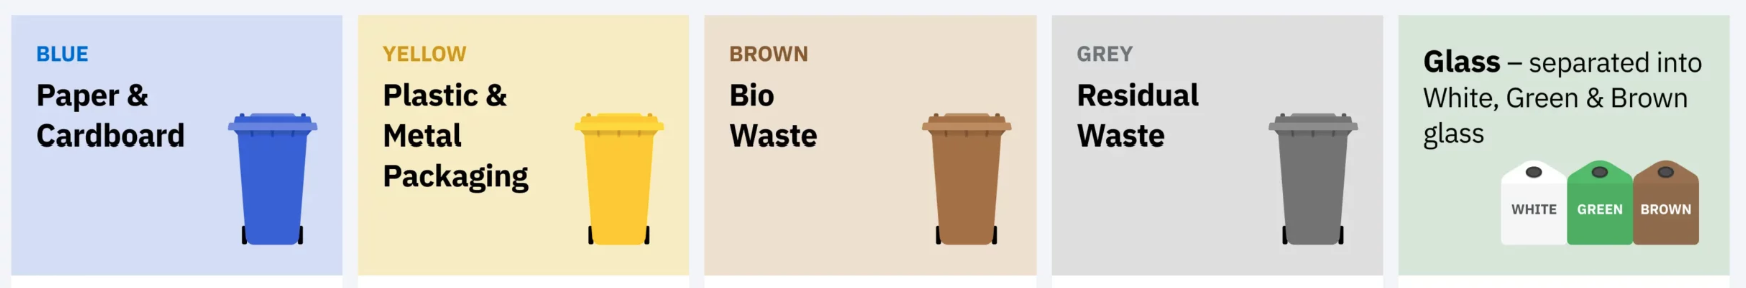